# Analisis exploratorio del perfil de afiliado de la Sociedad Espanola de Criminologia y Ciencias Forenses

En este documento, se realizara un analisis exploratorio para determinar el tipo de persona que tiende mas a afiliarse a la SECCIF, para asi intentar sacar de esta informacion conclusiones que nos den informacion valiosa (los llamados insights) de cara a elaborar estrategias de afiliacion futuras, teniendo en cuenta parametros como por ejemplo el perfil del afiliado, el tipo de sociedad o el potencial afiliado que no se esta afiliando.
Para respetar la privacidad de los afiliados, no se publicaran ni en este informe ni en ninguna otra plataforma sus datos personales.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('1lista de afiliados buena.xlsx', header=None)
df.dropna()
df.drop(df.columns[[0,1,2,3,4,6,7,8,10,11,12,13]],axis=1, inplace=True)
df.columns = ['Ciudad','Profesion']
df_profesion = df.groupby('Profesion').size()
df_ciudad = df.groupby('Ciudad').size()



c:\Users\aleja\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Cell M176 is marked as a date but the serial value 11003084 is outside the limits for dates. The cell will be treated as an error.
  for idx, row in parser.parse():


Con estas lineas de codigo, hemos eliminado la informacion sensible de la lista de afiliados y obtenido los dos grandes grupos que nos interesan, es decir, el numero de afiliados por ciudad, y el numero de afiliados por profesion. A continuacion procedo a la presentacion grafica del numero de afiliados por ciudad:

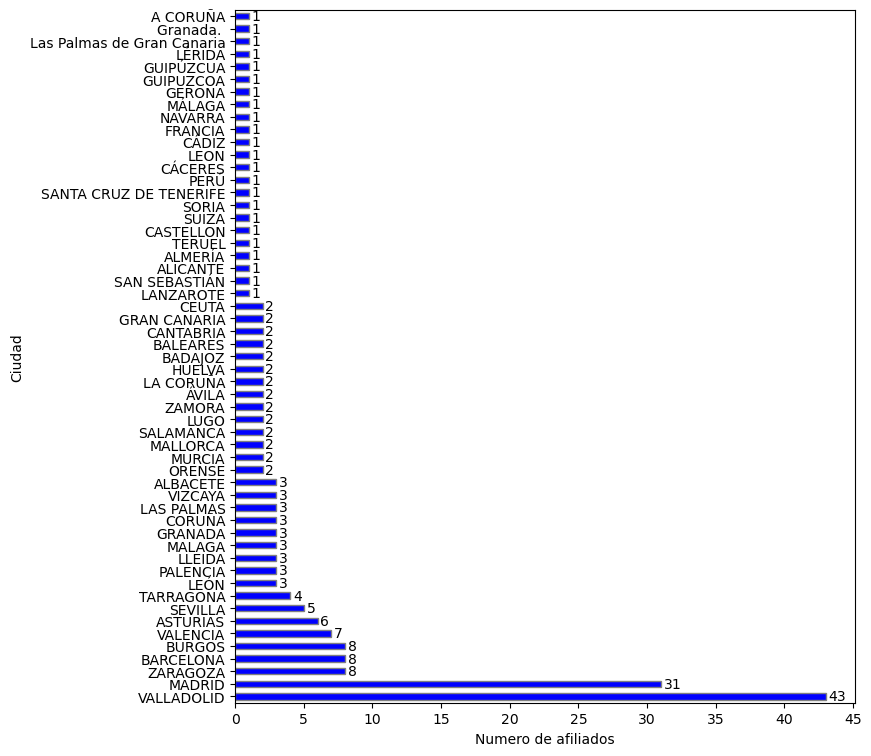

In [8]:
df_ciudad = df_ciudad.sort_values(ascending=False)
ax = df_ciudad.plot(kind='barh', figsize=(8,9), color='blue',edgecolor= 'grey')

plt.xticks(range(0, int(df_ciudad.max()) + 5, 5))

ax.set_xlabel('Numero de afiliados')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width() + 0.2, p.get_y() + p.get_height() / 2), 
                va='center', 
                ha='left', 
                color='black')

plt.show()


## Insights por ciudad
-De este grafico se infiere que la mayor parte de los afiliados provienen de Valladolid y de Madrid (de un total de 197 afiliados, 75 provienen de estas dos ciudades). Esto es perfectamente normal, ya que la sede de la Sociedad se encuentra en Valladolid (43 miembros), y gran parte de los afiliados en Madrid provienen de las actividades mas alla de la sociedad que realizan los miembros de la Junta directiva en Madrid. 

-Considero especialmente importante las ciudades que albergan entre 5 y 31 afiliados: Zaragoza, Barcelona, Burgos, Valencia, Asturias y Sevilla. Es un numero de afiliados suficientemente alto como para ser relevante y suficientemente bajo como para considerarlo mas como ciudades con potencial cuyo numero de afiliados podria aumentar. Que actividad tiene SECCIF en estas ciudades? Si la actividad es alta, el numero de afiliados es bajo. Si la actividad es baja, podrian ser ciudades con una alta predisposicion a interesarse por las actividades de SECCIF, por lo que consideraria interesante reforzar la presencia de actividades de la SECCIF en dichas ciudades para captar un mayor numero de socios

-Considero que la SECCIF no tiene suficiente calado en Castilla y Leon mas alla de las provincias de valladolid y, en menor medida Burgos. Seria posible adoptar estrategias de captacion de afiliados en otras provincias de Castilla y Leon? Esto no tendria un coste excesivo a nivel logistico debido a la cercania con la sede principal de Valladolid, y podria incrementar el numero de socios exponencialmente, ya que es un perfil de afiliado que podria desplazarse con facilidad a valladolid para seguir de cerca la actividad de la SECCIF, una vez se haya captado su interes.

A continuacion, me dispongo a representar graficamente el numero de afiliados en funcion de su profesion:

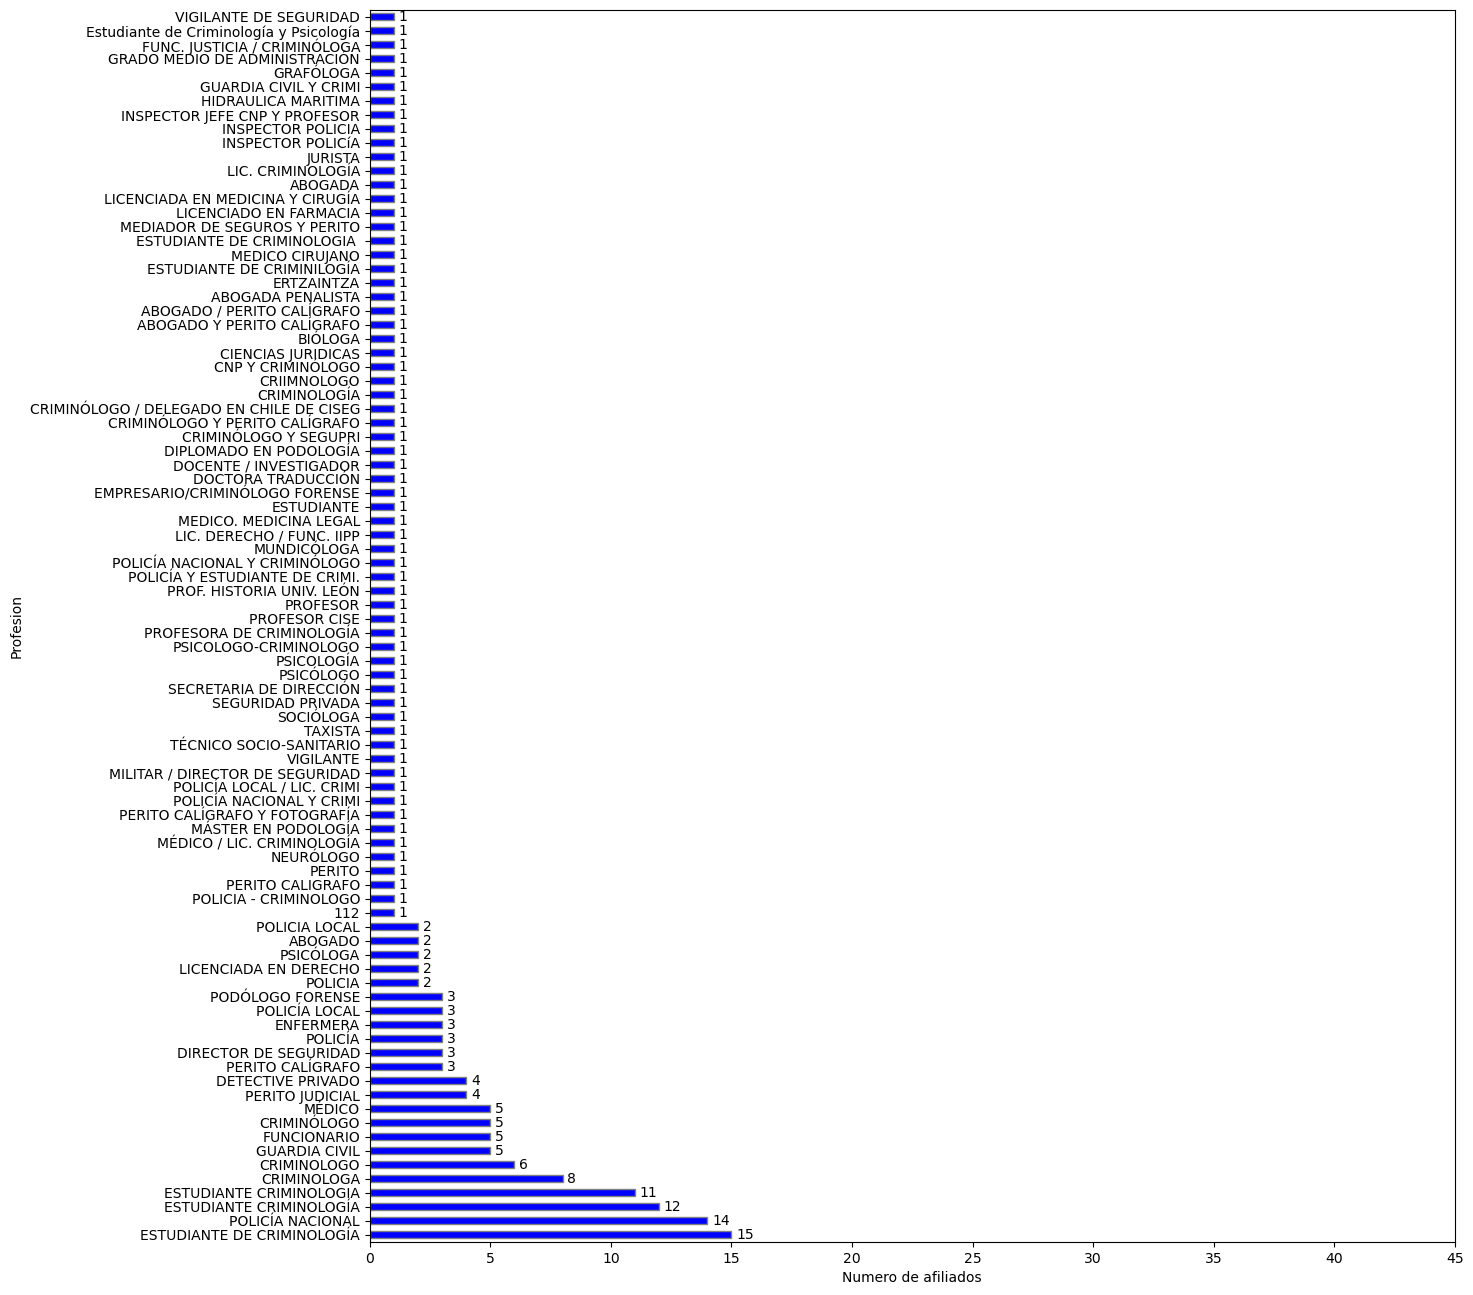

In [9]:
df_profesion = df_profesion.sort_values(ascending=False)
ax = df_profesion.plot(kind='barh', figsize=(14,16), color='blue',edgecolor= 'grey')

plt.xticks(range(0, int(df_ciudad.max()) + 5, 5))

ax.set_xlabel('Numero de afiliados')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width() + 0.2, p.get_y() + p.get_height() / 2), 
                va='center', 
                ha='left', 
                color='black')

plt.show()


## Insights por profesion:
Existe una gran variedad de profesiones reduntantes, debido a como esta dispuesta la base de datos de la SECCIF. Sugiero cambiar la disposicion para obtener una base de datos mas legible y evitar duplicidades. Por ejemplo, en vez de criminologo y criminologa, sugiero la utilizacion de un parametro como 'licenciado en criminologia', o en vez de estudiante criminologia, estudiante de criminologia y estudiante criminologia (con acento en la i), sugiero homogeneizar estas tres 'profesiones' en una. Dicho esto, no es una base de datos excesivamente grande y podemos distinguir los siguientes grandes grupos:

- Estudiantes de criminologia: aproximadamente el 20% de los afiliados

- Criminologos: aproximadamente el 15% de los afiliados

- Miembros de cuerpos y fuerzas de seguridad del estado (policia nacional, policia, guardia civil, policia local, militares): aproximadamente el 15% de los afiliados

- Otras profesiones relacionadas con la criminologia (detective privado, perito judicial, medico, psicologia etc) : aproximadamente el 50 % de los afiliados

Es decir, aunque la SECCIF tiene un gran calado entre estudiantes de criminologia, criminologos y Miembros de Cuerpos y Fuerzas de Seguridad del Estado, el 50% de los afiliados estan fuera de estos grupos. Considero oportuno intentar explotar este perfil de potencial afiliado en las ciudades con potencial expuestas anteriormente (medicos, psicologos, peritos, etc).



In [13]:
df_ciudad.to_csv('csv_seccif_ciudades')